In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
sns.set()

In [3]:
data_train = pd.read_excel("E-Commerce_train.xlsx")
data_test = pd.read_excel("E-Commerce_test.xlsx")
data_train.drop(columns="ID", inplace=True)
data_train["Warehouse_block"].replace({"A":0, "B":1, "C":2,"D":3, "F": 4}, inplace=True)
data_train["Mode_of_Shipment"].replace({"Flight":0, "Ship":1, "Road":2},inplace= True)
data_train["Product_importance"].replace({"low":0, "medium":1,"high":2},inplace= True)
data_train["Gender"].replace({"F":0, "M":1},inplace= True)
data_test["Warehouse_block"].replace({"A":0, "B":1, "C":2,"D":3, "F": 4}, inplace=True)
data_test["Mode_of_Shipment"].replace({"Flight":0, "Ship":1, "Road":2},inplace= True)
data_test["Product_importance"].replace({"low":0, "medium":1,"high":2},inplace= True)
data_test["Gender"].replace({"F":0, "M":1},inplace= True)
data_test.drop(columns='ID', inplace=True)
X = data_train[["Warehouse_block","Mode_of_Shipment","Customer_care_calls","Customer_rating","Cost_of_the_Product","Prior_purchases","Product_importance","Gender","Discount_offered","Weight_in_gms"]]
y = data_train["Reached.on.Time_Y.N"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=60, stratify=y)

In [6]:
#MODELO1
tree = DecisionTreeClassifier(max_depth=8,criterion='entropy',min_samples_leaf=3, min_samples_split=5)
#MODELO2
knn = KNeighborsClassifier(algorithm='auto', leaf_size=7, n_neighbors=18, weights='uniform')
#MODELO3
svm = SVC()
estimator_list = [
    ('knn',knn),
    ('svm', svm),
    ('tree',tree)]

voting_clf_hard = VotingClassifier(estimators=estimator_list, 
                                   voting='hard')
voting_clf_hard.fit(X_train,y_train)
y_train_pred = voting_clf_hard.predict(X_train)
y_test_pred = voting_clf_hard.predict(X_test)
print('Hard Voting')
print('Accuracy sobre conjunto de Train:', accuracy_score(y_train_pred,y_train))
precision = precision_score(y_test, y_test_pred)
print('Precision sobre test',precision)
exactitud = accuracy_score(y_test, y_test_pred)
print('Accuracy sobre test',exactitud)
precision = recall_score(y_test, y_test_pred, average=None)
print('Recall sobre test',precision)
precision = f1_score(y_test, y_test_pred)
print('F1_Score ', precision)
for clf_hard in (knn, svm, tree, voting_clf_hard):
    
    clf_hard.fit(X_train, y_train)
    y_pred = clf_hard.predict(X_test)
    
    print('Accuracy sobre',clf_hard.__class__.__name__, accuracy_score(y_test, y_pred))

Hard Voting
Accuracy sobre conjunto de Train: 0.728712321155716
Precision sobre test 0.831096196868009
Accuracy sobre test 0.6933333333333334
Recall sobre test [0.76981707 0.64947552]
F1_Score  0.7291462217860648
Accuracy sobre KNeighborsClassifier 0.6872222222222222
Accuracy sobre SVC 0.6916666666666667
Accuracy sobre DecisionTreeClassifier 0.7027777777777777
Accuracy sobre VotingClassifier 0.6922222222222222


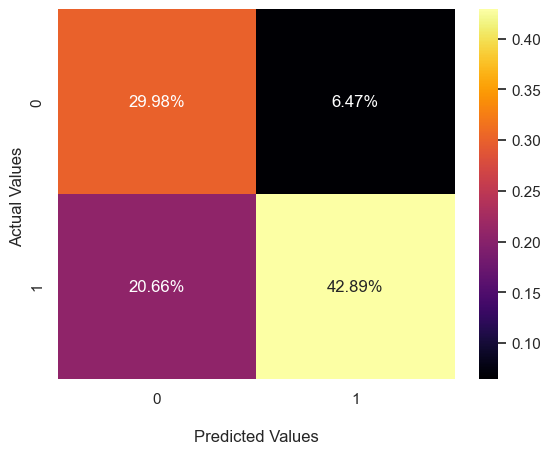

In [5]:
matrix = confusion_matrix(y_train, y_train_pred)
ax = sns.heatmap(matrix/np.sum(matrix), annot=True, 
            fmt='.2%', cmap='inferno')
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

In [9]:
#MODELO1
tree = DecisionTreeClassifier(max_depth=8,criterion='entropy',min_samples_leaf=3, min_samples_split=5)
#MODELO2
knn = KNeighborsClassifier(algorithm='auto', leaf_size=7, n_neighbors=18, weights='uniform')
#MODELO3
svm = SVC(probability=True)
estimator_list = [
    ('knn',knn),
    ('svm', svm),
    ('tree',tree)]

voting_clf_soft = VotingClassifier(estimators=estimator_list,
                                   voting='soft')
voting_clf_soft.fit(X_train,y_train)
y_train_pred = voting_clf_soft.predict(X_train)
y_test_pred = voting_clf_soft.predict(X_test)
print('Soft Voting')
print('Accuracy sobre conjunto de Train:', accuracy_score(y_train_pred,y_train))
precision = precision_score(y_test, y_test_pred)
print('Precision sobre test',precision)
exactitud = accuracy_score(y_test, y_test_pred)
print('Accuracy sobre test',exactitud)
precision = recall_score(y_test, y_test_pred,average=None)
print('Recall sobre test',precision)
precision = f1_score(y_test, y_test_pred)
print('F1_Score ', precision)
for clf_soft in (knn, svm, tree, voting_clf_soft):
    
    clf_soft.fit(X_train, y_train)
    y_pred = clf_soft.predict(X_test)
    
    print('Accuracy sobre',clf_soft.__class__.__name__, accuracy_score(y_test, y_pred))

Soft Voting
Accuracy sobre conjunto de Train: 0.7251007084317266
Precision sobre test 0.7828185328185329
Accuracy sobre test 0.69
Recall sobre test [0.6570122  0.70891608]
F1_Score  0.7440366972477065
Accuracy sobre KNeighborsClassifier 0.6872222222222222
Accuracy sobre SVC 0.6916666666666667
Accuracy sobre DecisionTreeClassifier 0.7016666666666667
Accuracy sobre VotingClassifier 0.6888888888888889
